# B31RX 2023 Tutorial 2: Mean Shift Algorithm

## Introduction


In this tutorial, we will discuss a pre-processing/clustering method called the mean shift algorithm.

Although often referred to as a clustering algorithm, mean shift does not explicitly
identify centres of clusters, it is an algorithm that identifies local maxima of a density
function.

In a nutshell, the mean shift is an iterative algorithm that takes as input a set of $N$  $d$-dimensional points $x_1, ..., x_N$ and will moves those points which will regroup in clusters.


## Method


The mean-shift relies on a kernel $K(.)$, such as those typically used for kernel density estimation (KDE), i.e., to obtain a smooth approximation of a probability density function from samples.

For each point $\mathbf{x}_i$, the local mean of the density can be approximated by

$$
m(\mathbf{x}_i) = \frac{\sum_{j \in V_i} K(\mathbf{x}_i - \mathbf{x}_j) \mathbf{x}_j}{\sum_{j \in V_i} K(\mathbf{x}_i - \mathbf{x}_j)}
$$

where $V_i$ denotes the set of indices of points in the neighbourhood of $x_i$. The difference $m(\mathbf{x}_i) - \mathbf{x}_i$ is called the mean shift. At each iteration of the algorithm, the point $\mathbf{x}_i$ will be replaced by $m(\mathbf{x}_i)$. Although the $N$ points can be updated sequentially, in practice, the updates can be performed in parallel, leading to

$$
\mathbf{x}^{(t+1)}_i = \frac{\sum_{j \in V_i} K(\mathbf{x}^{(t)}_i - \mathbf{x}^{(t)}_j) \mathbf{x}^{(t)}_j}{\sum_{j \in V_i} K(\mathbf{x}^{(t)}_i - \mathbf{x}^{(t)}_j)}
$$


Also note that $V_i$ can also change over time. A typical kernel chosen for KDE is the Gaussian kernel, leading to

$$
K(\mathbf{x}_i - \mathbf{x}_j) = \exp\left(-\frac{\|\mathbf{x}_i - \mathbf{x}_j\|^2}{c}\right)
$$

where $c$ represents the kernel bandwidth. With this kernel $V_i$ can be defined
efficiently by selecting points nearby that are close enough from $\mathbf{x}_i$, depending on the value of $c$.

As mentioned above, mean shift does not directly identify cluster centres but once it has converged, the $N$ original points will converge to a reduced number of local maxima. A clustering algorithm (such as K-means) must then be used to identify the centres and assign labels to the $N$ points.

## Questions and Exercises


In [ ]:
!git clone https://github.com/BISC-Group-HWU/B31XR.git

Cloning into 'B31XR'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 66 (delta 29), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (66/66), 4.66 MiB | 8.49 MiB/s, done.
Resolving deltas: 100% (29/29), done.


In [ ]:
%cd B31XR/Tutorial\ 2

/content/B31XR/Tutorial 2


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
from skimage.transform import resize
style.use("ggplot")
from mean_shift_algorithm import *
import time

##Q1. Run the code as is and assess if the algorithm is able to successfully identify the original clusters.


(220, 3)


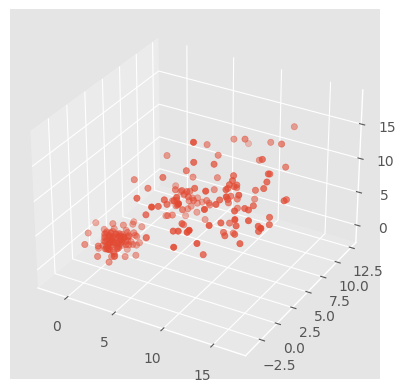

In [ ]:
centers = [[1,1,1]]
X1, _ =make_blobs(n_samples = 100, centers = centers, cluster_std = 1)

centers = [[5,5,5]]
X2, _ =make_blobs(n_samples = 20, centers = centers, cluster_std = 1)

centers = [[10,3,10]]
X3, _ =make_blobs(n_samples = 100, centers = centers, cluster_std = 3)

X = np.concatenate((X1, X2, X3), axis=0)
print(X.shape)

fig = plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2] , marker = 'o')
# plt.savefig('X.png')

Mean shift algorithm: started. Please wait.
Mean shift algorithm: done.
[[ 1.02574498  1.0041374   1.01913573]
 [ 1.02574498  1.0041374   1.01913573]
 [ 1.02574498  1.0041374   1.01913573]
 [ 1.02574498  1.0041374   1.01913573]
 [ 1.02574498  1.0041374   1.01913573]
 [ 1.02574498  1.0041374   1.01913573]
 [ 1.02574498  1.0041374   1.01913573]
 [ 1.02574498  1.0041374   1.01913573]
 [ 1.02574498  1.0041374   1.01913573]
 [ 1.02574498  1.0041374   1.01913573]
 [ 1.02574498  1.0041374   1.01913573]
 [ 1.02574498  1.0041374   1.01913573]
 [ 1.02574498  1.0041374   1.01913573]
 [ 1.02574498  1.0041374   1.01913573]
 [ 1.02574498  1.0041374   1.01913573]
 [ 1.02574498  1.0041374   1.01913573]
 [ 1.02574498  1.0041374   1.01913573]
 [ 1.02574498  1.0041374   1.01913573]
 [ 1.02574498  1.0041374   1.01913573]
 [ 1.02574498  1.0041374   1.01913573]
 [ 1.02574498  1.0041374   1.01913573]
 [ 1.02574498  1.0041374   1.01913573]
 [ 1.02574498  1.0041374   1.01913573]
 [ 1.02574498  1.0041374   1.01

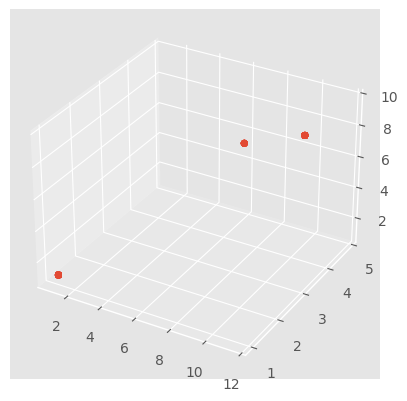

In [ ]:
print("Mean shift algorithm: started. Please wait.")
X2 = mean_shift(X, kernel_bandwidth=1) # Main mean-shift algorithm
print("Mean shift algorithm: done.")
print(X2)

fig = plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X2[:,0],X2[:,1],X2[:,2] , marker = 'o')
# plt.savefig('X2.png')

0.003457307815551758
[[11.48374174  3.35595884  9.60311092]
 [ 1.02574498  1.0041374   1.01913573]
 [ 5.92755079  4.83793671  5.36063979]]


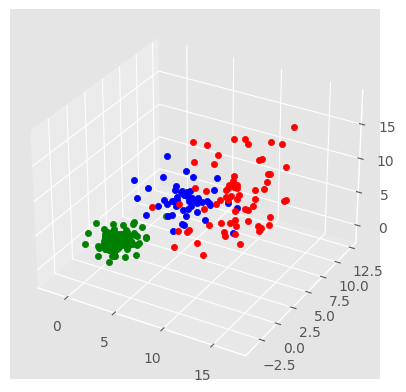

In [ ]:
t1 = time.time()
km=KMeans(n_clusters = 3)
km.fit(X2)
t2  = time.time() - t1
print(t2)

labels_km = km.labels_
cluster_centers_km = km.cluster_centers_

print(cluster_centers_km)

colors = 10*['r','g','b','c','k','y','m']
fig = plt.figure()
ax=fig.add_subplot(111,projection='3d')
for i in range(len(X2)):
    ax.scatter(X[i][0],X[i][1],X[i][2],c=colors[labels_km[i]] , marker = 'o')

plt.show()
# plt.savefig('result_X_X2.png')

##Q2. Change the value of the bandwidth and observe the impact on the “shifted” data and the clustering results. What do you observe? Try and adjust the bandwidth such that the 3 modes are preserved.


##Q3. Repeat the experiment by changing now the number of samples to 𝑁 = 5000 for clusters 1 and 3 and 100 for cluster 2. What do you observe?


##Q4. Change the number of samples back to 𝑁 = 100 and compare the clustering results to those obtained by using K-Means only. What do you observe?


0.008272886276245117
[[ 6.842855    4.31998338  7.06266681]
 [ 1.02699974  0.99706567  1.01674433]
 [11.96001146  2.48573705 10.48177625]]


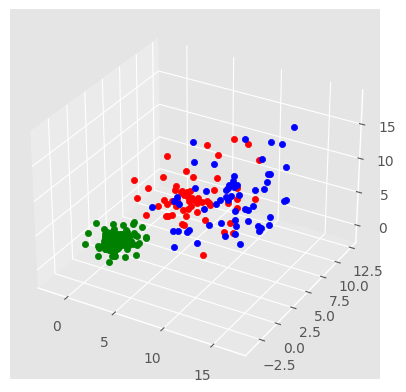

In [ ]:
t1 = time.time()
km=KMeans(n_clusters = 3)
km.fit(X)
t2  = time.time() - t1
print(t2)

labels_km = km.labels_
cluster_centers_km = km.cluster_centers_

print(cluster_centers_km)

colors = 10*['r','g','b','c','k','y','m']
fig = plt.figure()
ax=fig.add_subplot(111,projection='3d')
for i in range(len(X)):
    ax.scatter(X[i][0],X[i][1],X[i][2],c=colors[labels_km[i]] , marker = 'o')

plt.show()
# plt.savefig('result_X.png')

##Q5. Now we will change the input of the algorithm to an actual RGB image. Modify the code to load the image provided so that you obtain a set of $N$ 3D points to be fed to the mean-shift algorithm.

Visualise the shifted results and the final clustering results by displaying the classification map (an image where the colour corresponds to the labels assigned) and compare to the K-Means clustering results.


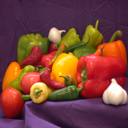

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.cluster import MeanShift, estimate_bandwidth, KMeans
import time
from mpl_toolkits.mplot3d import Axes3D

image = Image.open('peppers.png')

image = image.resize((128, 128))
display(image)


In [ ]:
colors = [
    (255, 0, 0),     # Red
    (0, 255, 0),     # Green
    (0, 0, 255),     # Blue
    (255, 255, 0),   # Yellow
    (255, 0, 255),   # Magenta
    (0, 255, 255),   # Cyan
    (128, 0, 0),     # Maroon
    (128, 128, 0),   # Olive
    (0, 128, 0),     # Dark Green
    (128, 0, 128),   # Purple
    (64, 224, 208),  # Turquoise
    (0, 100, 0),     # Dark Green
    (255, 165, 0),   # Orange
    (255, 20, 147),  # Deep Pink
    (75, 0, 130),    # Indigo
    # Add more colors if you have more clusters
]


In [ ]:
##################################################################################
from sklearn.cluster import MeanShift

# Assuming X is your data array
mean_shift = MeanShift(bandwidth=25, bin_seeding=True)
mean_shift.fit(X)

# Getting the cluster centers
cluster_centers = mean_shift.cluster_centers_

# Getting the labels for each point in X
labels = mean_shift.labels_
X2 = cluster_centers[labels]

##################################################################################

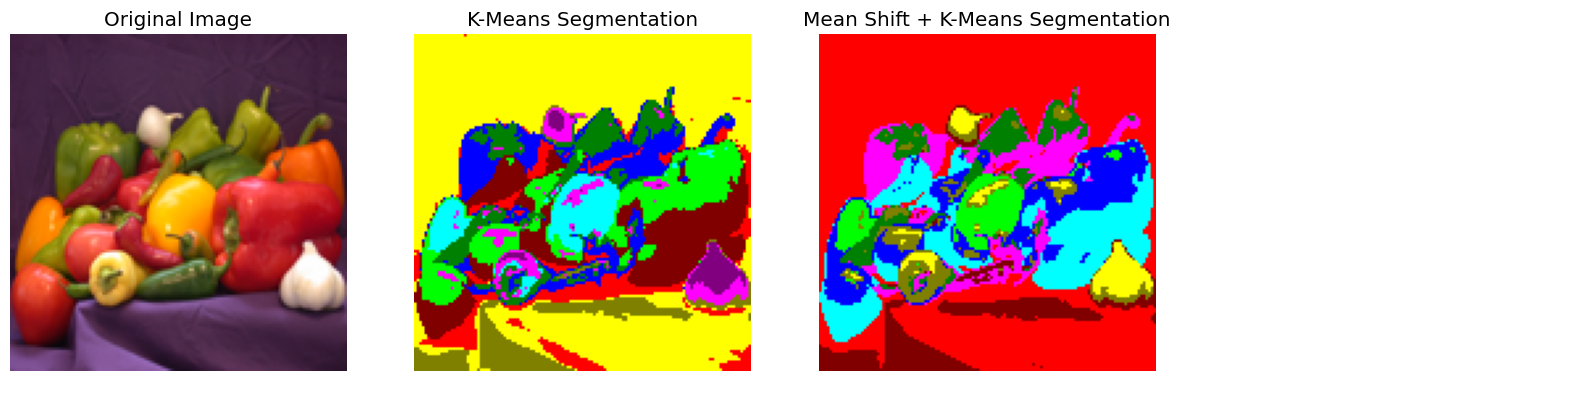

In [ ]:
# Map each pixel's label to its corresponding color
segmented_img_array = np.array([colors[label] for label in labels_km])
# Ensure the array is of type np.uint8 to represent RGB values correctly
segmented_img_array = segmented_img_array.astype(np.uint8)
# Reshape the array back to the original image dimensions
segmented_img = segmented_img_array.reshape((128, 128, 3))


# Display the original and segmented images
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[1].imshow(segmented_img)
axs[1].set_title('K-Means Segmentation')
axs[2].imshow(segmented_img_km)
axs[2].set_title('Mean Shift + K-Means Segmentation')

for ax in axs:
    ax.axis('off')

plt.show()

##Repeat the experiment by adding Gaussian noise with increasing variance to the input data and compare the results. What do you observe?

In [ ]:
# Generate Gaussian noise
# The shape of the noise array should match the shape of the image array
# 'mean' and 'std' define the mean and standard deviation of the Gaussian distribution
mean = 0
std = 0  # Standard deviation of the noise
noise = np.random.normal(mean, std, image.shape).astype(np.uint8)

##Q6 (Optional)
## The classification task using only 1 intensity value (grayscale image) or 3 values (RBG image) per pixel can be challenging in the presence of noise. One way to improve the classification results is by enriching the representation of each pixel, for instance, by including information from neighbouring pixels.

## Instead of using 3 values per pixel, stack the RBG information of the 8-nearest neighbours, leading to 27 (3 + 8*3) values per pixel and run the mean shift and KMeans clustering algorithm. What do you observe?

In [ ]:
import numpy as np

def stack_neighbors(X):
    # Assuming X is a numpy array of shape (128, 128, 3) for an RGB image

    # Pad the image array to handle edge cases for the 3x3 neighborhood
    padded_image = np.pad(X, ((1, 1), (1, 1), (0, 0)), mode='edge')

    # Initialize an empty list to hold the feature vectors
    feature_vectors = []

    # Iterate through each pixel in the image (excluding the padding)
    for i in range(1, padded_image.shape[0] - 1):
        for j in range(1, padded_image.shape[1] - 1):
            # Extract the 3x3 neighborhood around the current pixel
            neighborhood = padded_image[i-1:i+2, j-1:j+2, :].reshape(-1, 3)

            # Flatten the neighborhood into a single feature vector and add it to the list
            feature_vector = neighborhood.flatten()
            feature_vectors.append(feature_vector)

    # Convert the list of feature vectors into a NumPy array
    X2 = np.array(feature_vectors)

    # Ensure X2 is of shape (128*128, 27)
    assert X2.shape == (128*128, 27), "The output shape is not as expected."

    return X2